# Passo 1. Configuração do projeto

In [112]:
import joblib
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

print(f'Matplot version: {matplotlib.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Sklearn version: {sklearn.__version__}')

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'diabetes.csv'
DIABETES_DATA = os.path.join(DATA_PATH, DATA_FILE)

DEPLOY_PATH = os.path.join('..', 'model')
DEPLOY_FILE = 'finalized_model.sav'

RANDOM_STATE = 42

print('Config completa')

Matplot version: 3.3.2
Numpy version: 1.19.2
Pandas version: 1.1.3
Seaborn version: 0.11.0
Sklearn version: 0.23.2
Config completa


# Passo 2. Carga de dados

In [73]:
def load_data(data_path, data_file):
    csv_path = os.path.join(data_path, data_file)
    return pd.read_csv(csv_path)

In [74]:
diabetes_data = load_data(DATA_PATH, DATA_FILE)

# Passo 3. Análise exploratória de dados

In [75]:
print(f'Diabetes dataset tem {diabetes_data.shape[0]} linhas e {diabetes_data.shape[1]} colunas')

Diabetes dataset tem 768 linhas e 9 colunas


In [76]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

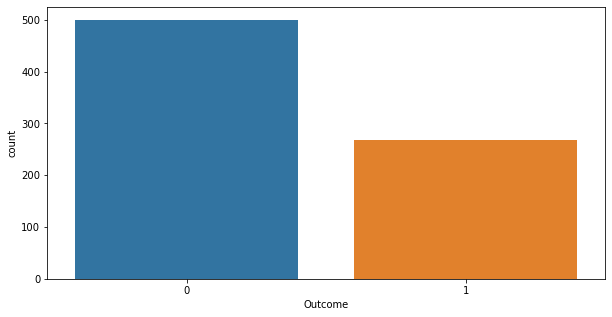

In [77]:
plt.figure(figsize=(10,5))
_ = sns.countplot(x='Outcome', data=diabetes_data)

## Verificando valores nulos

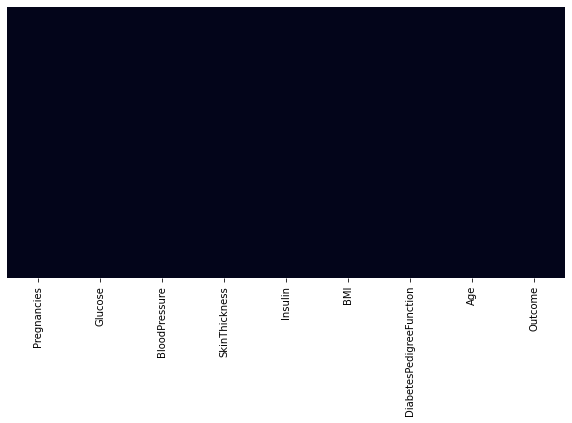

In [78]:
plt.figure(figsize=(10,5))
_ = sns.heatmap(diabetes_data.isnull(), yticklabels=False, cbar=False)

## Correlação e distribuição dos dados

In [79]:
x = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']

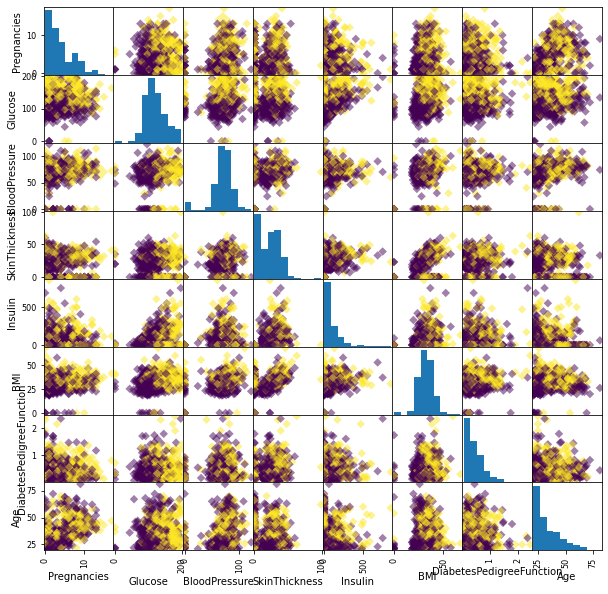

In [80]:
_ = pd.plotting.scatter_matrix(x, c=y, figsize=[10,10], marker='D')

# Passo 4. Particionamento do dataset

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=.3, random_state=RANDOM_STATE)

# Passo 5. Treinamento do modelo

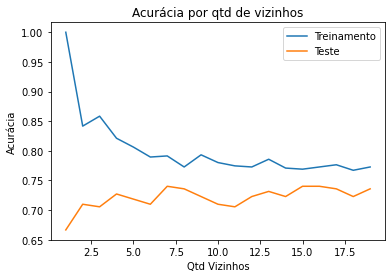

In [93]:
neighbors = np.arange(1,20)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    train_acc[i] = clf.score(x_train, y_train)
    test_acc[i] = clf.score(x_test, y_test)

plt.title('Acurácia por qtd de vizinhos')
plt.plot(neighbors, train_acc, label='Treinamento')
plt.plot(neighbors, test_acc, label='Teste')
plt.legend()
plt.xlabel('Qtd Vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [101]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [109]:
resultados_cv = cross_val_score(knn, x_train, y_train, cv=5)
print('Results do cross validation em treinamento\n', resultados_cv)

Results do cross validation em treinamento
 [0.67592593 0.68518519 0.74766355 0.70093458 0.71028037]


In [110]:
print('Médias dos resultados do cross validation em treinamento: ', np.mean(resultados_cv))

Médias dos resultados do cross validation em treinamento:  0.7039979231568017


In [115]:
knn_padrao = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,10)}
knn_cv = GridSearchCV(knn_padrao, param_grid, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [118]:
print(f'Qtd de vizinhos: {knn_cv.best_params_}')
print(f'Melhor resultado com {knn_cv.best_params_} foi de {knn_cv.best_score_}')

Qtd de vizinhos: {'n_neighbors': 9}
Melhor resultado com {'n_neighbors': 9} foi de 0.7245067497403946


# Passo 6. Teste do modelo

In [102]:
y_pred = knn.predict(x_test)
print(f'Predições em teste \n {y_pred}')

Predições em teste 
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 1 1 0]


# Passo 7. Avaliação do modelo

In [103]:
#  acurácia 5 vizinhos 0.7186147186147186
print(f'Acurácia do modelo: {knn.score(x_test, y_test)}')

Acurácia do modelo: 0.7402597402597403


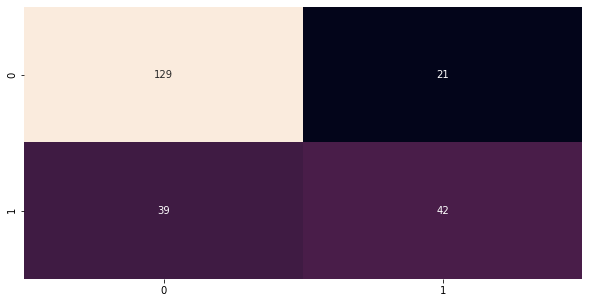

In [104]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
_ = sns.heatmap(cm, annot=True, cbar=False, fmt='d')

In [105]:
print('Precisão, revogação e f1-score:')
print(classification_report(y_test, y_pred))

Precisão, revogação e f1-score:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

